# EDA songs 
## Bogdan Kaleb García Rivera

Este proyecto tiene como finalidad mostrar un proceso EDA aplicado a un conjunto de canciones obtenidas a través de webscraping

In [103]:
import pandas as pd

In [104]:
import json

def convert_json(archivo_entrada, archivo_salida, indent=4):
    """
    El archivo JSON no se encuentra en un formato válido que pandas
    pueda leer, por lo que esta función realiza la conversión del formato 
    JSON (no modifica en nada su contenido)
    """
    try:
        with open(archivo_entrada, 'r', encoding='utf-8') as f:
            lines = [line.strip() for line in f if line.strip()]

        # Convierte cada linea
        datos = [json.loads(line) for line in lines]

        with open(archivo_salida, 'w', encoding='utf-8') as f:
            json.dump(datos, f, ensure_ascii=False, indent=indent)

        print(f"¡Archivo convertido con éxito! Guardado en: {archivo_salida}")
        return True

    except json.JSONDecodeError as e:
        print(f"Error al decodificar JSON en línea: {e}")
        return False
    except Exception as e:
        print(f"Error inesperado: {e}")
        return False

In [105]:
convert_json(
    archivo_entrada='songs.json',
    archivo_salida='songs_fixed.json',
    indent=2 
)

¡Archivo convertido con éxito! Guardado en: songs_fixed.json


True

In [106]:
df = pd.read_json('./songs_fixed.json')
print("Columnas del dataset: ",df.columns)
df.head()

Columnas del dataset:  Index(['song_name', 'artist_name', 'album_name', 'lyrics', 'release_date',
       'producers', 'tags'],
      dtype='object')


,song_name,artist_name,album_name,lyrics,release_date,producers,tags
0,ІНТЕРСІТІ (Intercity),NORD DIVISION,АЗАРТ - EP,1 Contributor\nІНТЕРСІТІ (Intercity) Lyrics\nЗ...,"March 1, 2025",[],"[Rap, Українською (In Ukrainian), Український ..."
1,Ya ya,Hurriganes,Jailbird,1 Contributor\nYa ya Lyrics\nSitting in the la...,None,[],[Pop]
2,#ДЕНЬГИБЛЯНУЖНЫМНЕ (#INEEDTHEFUCKINGMONEY),huzzy b,None,3 Contributors\n#ДЕНЬГИБЛЯНУЖНЫМНЕ (#INEEDTHEF...,"August 23, 2024",[],"[Rap, Trap, Русский трэп (Russian Trap), Русск..."
3,МАРЕВО (MIRAGE),FCK FAMOUS GROUP,"ХОРОШИЙ ПОГАНИЙ ЗЛИЙ (THE GOOD, THE BAD AND TH...",1 Contributor\nМАРЕВО (MIRAGE) Lyrics\nЯкий же...,"February 14, 2025",[],"[Rap, Український реп (Ukrainian Rap), Україна..."
4,Seni Kaybettim,Feridun Düzağaç,None,"1 Contributor\nSeni Kaybettim Lyrics\n[""Seni K...","August 2, 2024",[],"[Pop, Türkçe Pop, Türkçe, Türkiye]"


Crear una columna llamada `length` a partir de la longitud de cada uno de los textos de la columna `text`.

In [107]:
df['length'] = df['lyrics'].str.len()
df.head()

,song_name,artist_name,album_name,lyrics,release_date,producers,tags,length
0,ІНТЕРСІТІ (Intercity),NORD DIVISION,АЗАРТ - EP,1 Contributor\nІНТЕРСІТІ (Intercity) Lyrics\nЗ...,"March 1, 2025",[],"[Rap, Українською (In Ukrainian), Український ...",2614
1,Ya ya,Hurriganes,Jailbird,1 Contributor\nYa ya Lyrics\nSitting in the la...,None,[],[Pop],257
2,#ДЕНЬГИБЛЯНУЖНЫМНЕ (#INEEDTHEFUCKINGMONEY),huzzy b,None,3 Contributors\n#ДЕНЬГИБЛЯНУЖНЫМНЕ (#INEEDTHEF...,"August 23, 2024",[],"[Rap, Trap, Русский трэп (Russian Trap), Русск...",1368
3,МАРЕВО (MIRAGE),FCK FAMOUS GROUP,"ХОРОШИЙ ПОГАНИЙ ЗЛИЙ (THE GOOD, THE BAD AND TH...",1 Contributor\nМАРЕВО (MIRAGE) Lyrics\nЯкий же...,"February 14, 2025",[],"[Rap, Український реп (Ukrainian Rap), Україна...",1274
4,Seni Kaybettim,Feridun Düzağaç,None,"1 Contributor\nSeni Kaybettim Lyrics\n[""Seni K...","August 2, 2024",[],"[Pop, Türkçe Pop, Türkçe, Türkiye]",1163


# Calculo de resúmenes estadísticos por columna

El método `describe()` sin parámetros genera cinco estadísticos de las variables numéricas ([doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)).

In [108]:
df.describe()

,length
count,10098.000000
mean,1825.714696
std,3167.818532
min,0.000000
25%,1018.000000
50%,1549.000000
75%,2257.750000
max,190146.000000


El método `describe()` con el parámetro `include = O` genera cinco estadísticos de las variables no numéricas.

In [109]:
df.describe(include='O')

,song_name,artist_name,album_name,lyrics,release_date,producers,tags
count,10098,10098,7276,10098,8523,10098,10098
unique,9780,2429,3022,9709,3016,1765,4075
top,Forever,​yngblеss,Alma Mater & Fight Song,,"March 14, 2025",[],[Pop]
freq,8,21,28,390,57,7770,1348




# Revisar datos faltantes

El método `isna()` detecta los valores faltantes, por lo que retorna un valor booleano si el valor es un NA (valores None o `Numpy.NaN`). docs/reference/api/pandas.DataFrame.isna.html)

In [110]:
"""
Se usa este método sum() para contabilizar el número 
de valores NA por columna 
"""
df_isna = df.isna().sum() 
df_isna

song_name          0
artist_name        0
album_name      2822
lyrics             0
release_date    1575
producers          0
tags               0
length             0
dtype: int64

El método `fillna()` permite llena los valores NA/NaN. Para este caso solo existen dos columnas con valores nulos, por lo que los cambios serán muy particulares en estas columnas. Se usa inplace=True para modificar el dataframe original. 

In [111]:
df['album_name'].fillna("No album",inplace=True)
df['release_date'].fillna("No release date",inplace=True)

df.isna().sum()

/tmp/ipykernel_9640/1024341154.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['album_name'].fillna("No album",inplace=True)
/tmp/ipykernel_9640/1024341154.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

song_name       0
artist_name     0
album_name      0
lyrics          0
release_date    0
producers       0
tags            0
length          0
dtype: int64

El método 'contains()' permite encontrar coincidencias que estás contenidas dentro de las cadenas de texto de una Serie o un índice de pandas. Por ejemplo se puede buscar canciones de Above & Beyond o Mac Miller. Para este caso se usa value_counts() para asegurarse que los artistas no tienen canciones con nombres repetidos. 

In [112]:
resultado_a_and_b = df[df['artist_name'].str.contains('Above & Beyond')]
resultado_mac_miller = df[df['artist_name'].str.contains('Mac Miller')]

print("Canciones de Above & Beyond: \n",resultado_a_and_b['song_name'].value_counts())

Canciones de Above & Beyond: 
 song_name
Crazy Love                      1
Peace of Mind (Acoustic)        1
Fly to New York                 1
Reverie                         1
We’re All We Need               1
No One On Earth                 1
We’re All We Need (Acoustic)    1
Alchemy                         1
Sahara Love                     1
There’s Only You                1
You Got to Go                   1
Good For Me                     1
Peace of Mind                   1
My Own Hymn                     1
Love Is Not Enough              1
Always                          1
Name: count, dtype: int64


In [113]:
resultado_mac_miller.head()

,song_name,artist_name,album_name,lyrics,release_date,producers,tags,length
3735,Planet God Damn,Mac Miller,The Divine Feminine,48 Contributors\nTranslations\nEspañol\nSvensk...,"September 16, 2016","[Vinylz, Ging]","[Rap, USA, In English]",2539
3740,Skin,Mac Miller,The Divine Feminine,70 Contributors\nTranslations\nFrançais\nEspañ...,"September 16, 2016",[],"[R&B, Rap, USA, In English, Soul Jazz]",2630


In [114]:
print("Canciones de Mac miller: \n",resultado_mac_miller['song_name'].value_counts())

Canciones de Mac miller: 
 song_name
Planet God Damn    1
Skin               1
Name: count, dtype: int64


# Representación grafica de la distribución de los valores

## Gráfica de caja o Boxplot

Un boxplot es útil para resumir la distribución de los datos, destacando valores mínimos, máximos, la mediana y posibles outliers.

Se puede hacer un boxplot con respecto al numero de productores

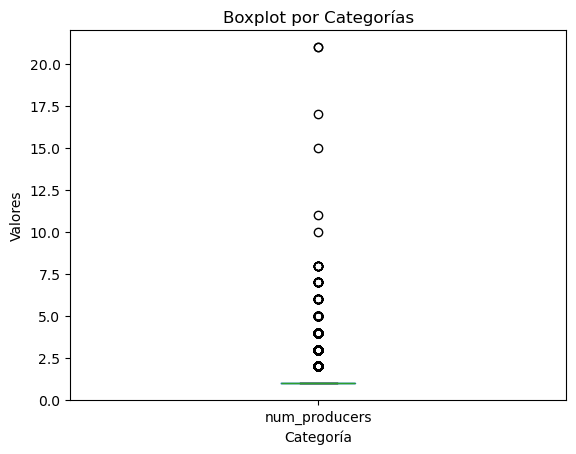

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['num_producers'] = df['producers'].apply(lambda x: len(str(x).split(',')))


df.boxplot(column="num_producers", grid=False)

plt.title("Boxplot por Categorías")
plt.suptitle("")  
plt.xlabel("Categoría")
plt.ylabel("Valores")
plt.show()

De igual manera se puede hacer con respecto a la longitud de la letra de las canciones


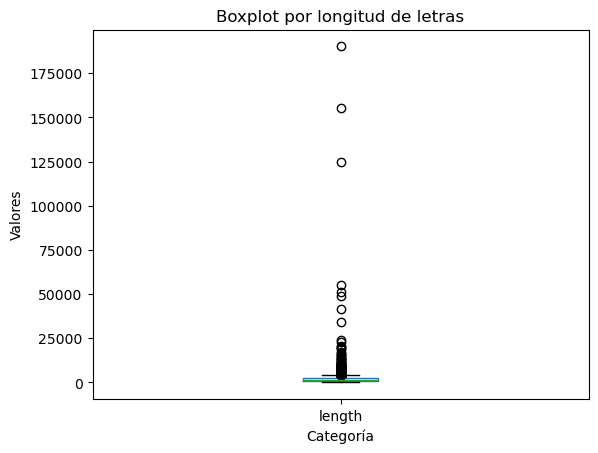

In [116]:

df.boxplot(column="length", grid=False)


plt.title("Boxplot por longitud de letras")
plt.suptitle("")  
plt.xlabel("Categoría")
plt.ylabel("Valores")
plt.show()

## Gráfica de barras o barplot

Un barplot (gráfico de barras) es una representación visual que utiliza barras para comparar diferentes categorías o grupos de datos de forma clara y efectiva. La longitud o altura de las barras es proporcional al valor que representan, lo que permite observar rápidamente diferencias y patrones.

Se puede aplicar una gráfica de barras al número de productores

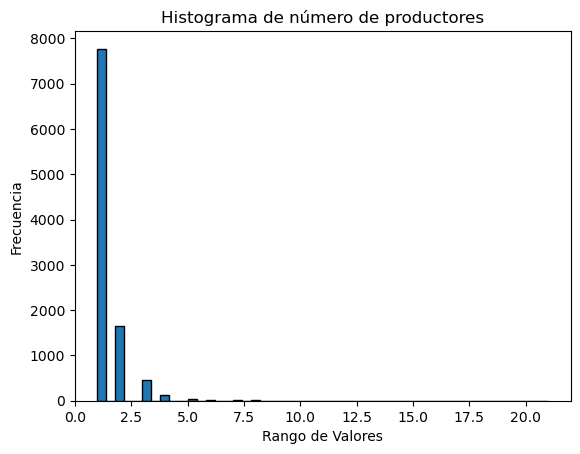

In [117]:
df['num_producers'].plot.hist(bins=50,edgecolor = "black")

plt.title("Histograma de número de productores")
plt.xlabel("Rango de Valores")
plt.ylabel("Frecuencia")

plt.show()


De igual forma se puede realizar lo mismo para la longitud de las canciones

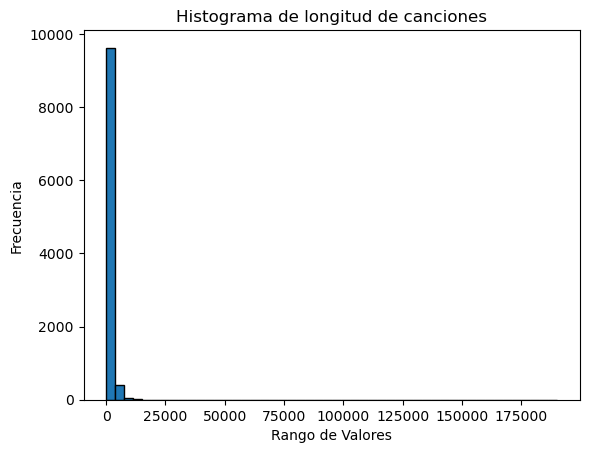

In [118]:
df['length'].plot.hist(bins = 50, edgecolor="black")

plt.title("Histograma de longitud de canciones")
plt.xlabel("Rango de Valores")
plt.ylabel("Frecuencia")

plt.show()

# Comparación de valores de distribución sobre categorías

__Seaborn__ es una biblioteca de visualización de datos basada en Matplotlib que proporciona una interfaz de alto nivel para crear gráficos estadísticos de manera sencilla y con estilos preconfigurados. Está diseñada para trabajar de manera efectiva con estructuras de datos como DataFrames de pandas, lo que facilita la exploración y representación visual de datos en proyectos de análisis.

## isin

El método `isin` en pandas se utiliza para filtrar filas en un `DataFrame` o `Series` que contienen valores específicos de una lista, conjunto u otro iterable. Es especialmente útil para realizar búsquedas rápidas o verificaciones de pertenencia en un conjunto de datos.

Se puede realizar para detectar las palabras 'love' y 'drug' en el nombre de canciones

In [119]:
palabras_deseadas = ['Love','Drug']
filtro = df[df["song_name"].isin(palabras_deseadas)]
filtro.head()


,song_name,artist_name,album_name,lyrics,release_date,producers,tags,length,num_producers
1029,Love,4L JAVI,4 L,2 Contributors\nLove Lyrics\n[Intro]\nI usuall...,"May 9, 2019",[],[R&B],1337,1
3871,Love,Nasty,Love,2 Contributors\nLove Lyrics\nWe're all the sam...,No release date,[],[Pop],1037,1
8375,Love,Trousdale,What Happiness Is,2 Contributors\nLove Lyrics\n[Verse 1]\nI ain'...,"November 12, 2021","[Georgia Greene, Lauren Jones, Quinn D’Andrea]",[Country],2018,3
9878,Love,USED & Jamie McCool,No album,1 Contributor\nLove Lyrics\n[Verse]\nThis time...,"November 15, 2024",[],"[Pop, Electronic, EDM, Drum & Bass]",1172,1


El método `catplot` en Seaborn se utiliza para crear gráficos categóricos, lo que permite visualizar datos categóricos y sus relaciones con variables numéricas o categóricas adicionales. Es altamente versátil y puede generar varios tipos de gráficos categóricos, como gráficos de barras, gráficos de puntos, gráficos de cajas, etc.

Se puede utilizar catplot para verificar los datos estadísticos de los nomnres de las canciones filtradas con el número de productores. 

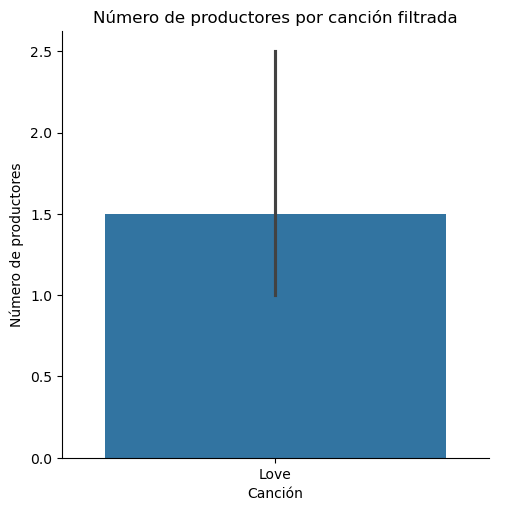

In [120]:
sns.catplot(data=filtro, x="song_name", y="num_producers", kind="bar")
plt.xlabel("Canción")
plt.ylabel("Número de productores")
plt.title("Número de productores por canción filtrada")
plt.show()


Una variación de `catplot` son los gráficos de violín

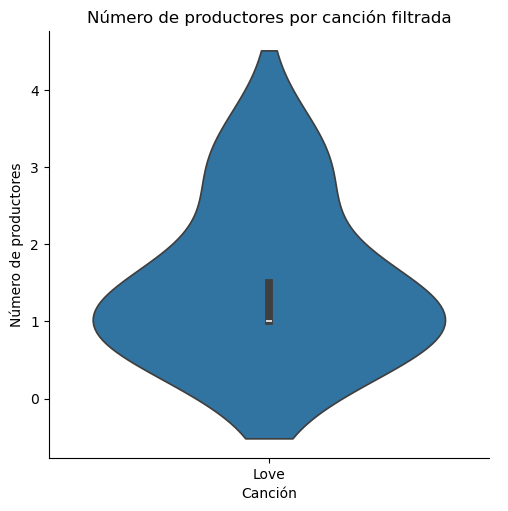

In [121]:
sns.catplot(data=filtro, x="song_name",y= "num_producers", kind="violin")
plt.xlabel("Canción")
plt.ylabel("Número de productores")
plt.title("Número de productores por canción filtrada")
plt.show()

# Visualización de desarrollo sobre el tiempo 

En algunos casos, alguna de las columnas (características) de nuestro conjunto de datos, permitirá un análisis en un periodo de tiempo. En nuestro caso columna `year` permite realizar una visualización del desarrollo de las longitudes de los discursos cada año. 

Para este análisis, utilizaremos el método `groupby` del dataframe permite grupar y realizar operaciones agregadas sobre datos. Es decir, permite dividir un conjunto de datos en grupos basados en valores de una o más columnas y luego aplicar funciones como suma, promedio, conteo, etc., a cada grupo.


In [122]:
df['year'] = df['release_date'].str.extract(r'(\d{4})')

resultado_groupby = df.groupby('year').size().reset_index(name='cantidad_canciones')
print(resultado_groupby.head(100))

    year  cantidad_canciones
0   0001                   2
1   1894                   2
2   1897                   1
3   1900                   1
4   1901                   1
..   ...                 ...
77  2021                 734
78  2022                 794
79  2023                 932
80  2024                1346
81  2025                 745

[82 rows x 2 columns]


Se pudiese ver cuantas canciones existen por album 

In [123]:
df_album = df.groupby('album_name')['song_name'].count()
print("\nNúmero de canciones por álbum:\n", df_album)


Número de canciones por álbum:
 album_name
 My Dogs for Life                                            2
 Posse EP Volume 2                                           1
 Reckless (Deluxe Edition)                                  11
 The Best of JUNIOR M.A.F.I.A.                               1
 To Markos III                                               2
                                                            ..
유플래쉬 (Yoo Flash)                                             1
하이라키 OST [Hierarchy (Soundtrack from the Netfilx Series)     1
학교 2021 (School 2021) OST Part.2                             1
홈타운 OST (Hometown Original Television Soundtrack) Part 1     1
﹤3                                                           1
Name: song_name, Length: 3023, dtype: int64


De igual forma visualizar el numero de canciones por artista

In [124]:
canciones_por_artista = df.groupby('artist_name')['song_name'].count()
print("Número de canciones por artista:\n", canciones_por_artista)

Número de canciones por artista:
 artist_name
#LVLUP GRIME CLASH     1
#LikeMe Cast           1
$kyhook                1
$neep                  1
$tupid Young           1
                      ..
花冷え。(HANABIE.)         1
蔡依林 (Jolin Tsai)       1
薛之谦 (Joker Xue)        1
许佳琪 (Xu JiaQi)         1
郑润泽 (Zheng Run Ze)    19
Name: song_name, Length: 2429, dtype: int64


O la longitud promedio de canciones (caracteres) 

In [125]:
longitud_prom_por_cancion = df.groupby('song_name')['length'].mean()
print("Longitud promedio de las letras por canciones: ",longitud_prom_por_cancion)

Longitud promedio de las letras por canciones:  song_name
#1 Hit Song                         167.0
#4BarFriday                        2417.0
#AYFKM (Freestyle)                 1851.0
#ETHEREALSHAWTY                    1641.0
#Frenchmen - Saison 1 - Nusky      1611.0
                                    ...  
환상동화 (Secret Story of the Swan)    1786.0
회전목마 (MERRY-GO-ROUND)              1383.0
︎i of the storm                    1795.0
󠁪obvio..                           1379.0
󠁪solo un nombre                    1572.0
Name: length, Length: 9780, dtype: float64


Se puede visualizar gráficamente los resultados de estas operaciones. 

Númer de canciones por artista: 

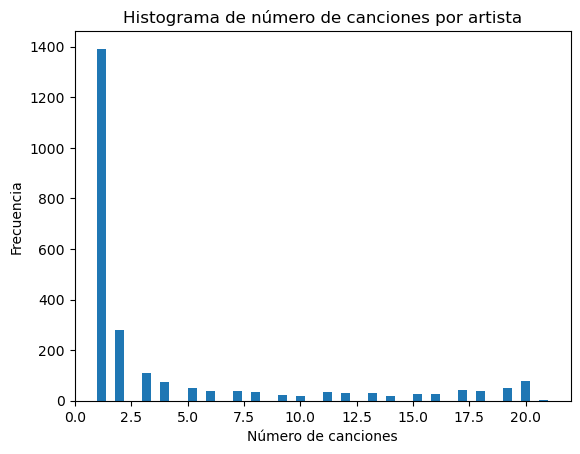

In [126]:
import matplotlib.pyplot as plt

canciones_por_artista.plot.hist(bins=50)
plt.xlabel("Número de canciones")
plt.ylabel("Frecuencia")
plt.title("Histograma de número de canciones por artista")
plt.show()

Longitud promedio por canción: 

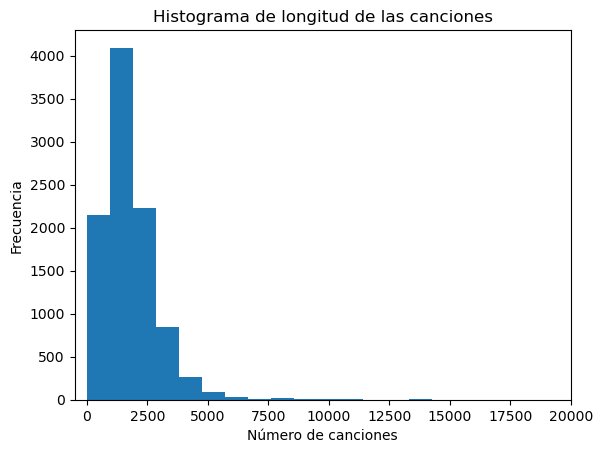

In [127]:
import matplotlib.pyplot as plt

longitud_prom_por_cancion.plot.hist(bins=200)
plt.xlabel("Número de canciones")
plt.ylabel("Frecuencia")
plt.title("Histograma de longitud de las canciones")
plt.xlim(-500,20000)
plt.show()